# Draw Confusion Matrix
draw confusion martrix from saved .pt file.  
Notice: you should change the gait_cycle, sampling, and pref_path keyword first, then run all cells.

In [7]:
# dict for title/res path pair 
# running on pegasus
# 2025-06027 first run

pegasus = {
	"add":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_add_5/2025-06-27/10-34-53/best_preds",
	"mul":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_mul_5/2025-06-27/10-34-54/best_preds",
	"concat":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_concat_5/2025-06-27/10-34-54/best_preds",
	"avg":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_avg_5/2025-06-27/10-34-54/best_preds",
	"late":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_late_5/2025-06-27/10-34-54/best_preds",
	"none":
		"/home/SKIING/chenkaixu/code/KnowledgeGuided-ASD_PyTorch/logs/3dcnn_attn_map_True_none_5/2025-06-27/10-34-54/best_preds",
}



****************************************************************************************************
pegasus, add
fold: 10
****************************************************************************************************
add
accuracy: 0.6987
precision: 0.7387
recall: 0.6987
f1_score: 0.6993
auroc: 0.8364
confusion_matrix:
[[81.628784   4.040404  14.330809 ]
 [28.556389  54.23082   17.212791 ]
 [23.677328   2.5648763 73.7578   ]]
####################################################################################################


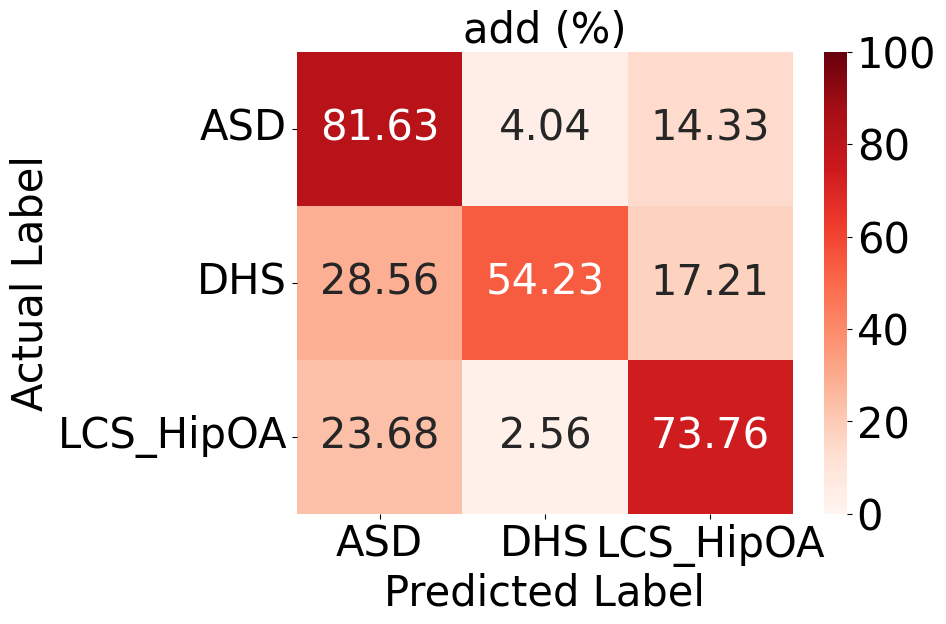

****************************************************************************************************
pegasus, mul
fold: 10
****************************************************************************************************
mul
accuracy: 0.4977
precision: 0.6433
recall: 0.4977
f1_score: 0.4796
auroc: 0.7079
confusion_matrix:
[[73.71212     0.32828283 25.959597  ]
 [48.677456   23.029345   28.293196  ]
 [47.062965    0.37215853 52.564877  ]]
####################################################################################################


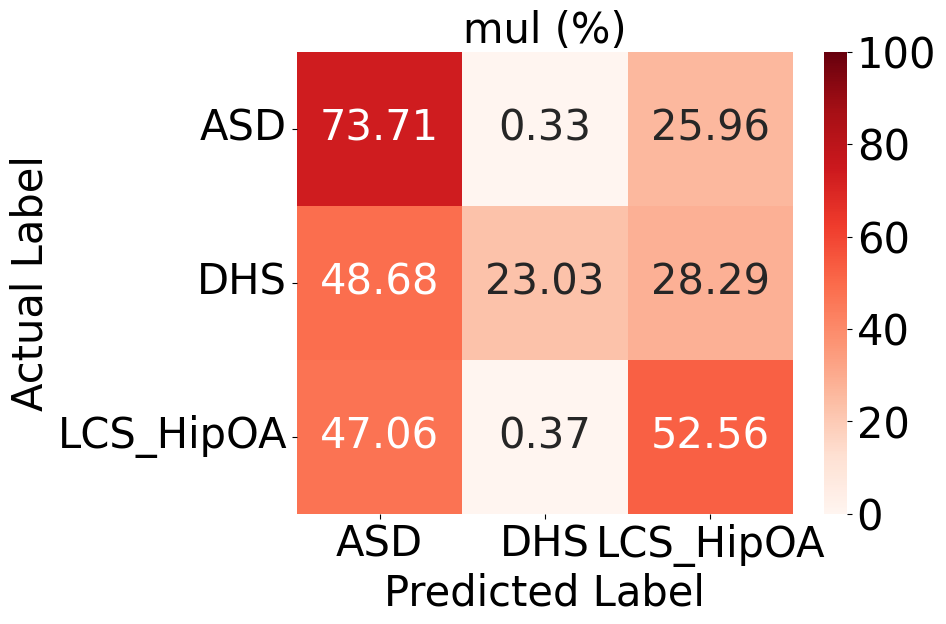

****************************************************************************************************
pegasus, concat
fold: 7
****************************************************************************************************
concat
accuracy: 0.6853
precision: 0.7047
recall: 0.6853
f1_score: 0.6600
auroc: 0.7994
confusion_matrix:
[[89.35764   6.593174  4.049184]
 [28.774422 63.153736  8.071837]
 [37.134052  9.797124 53.06882 ]]
####################################################################################################


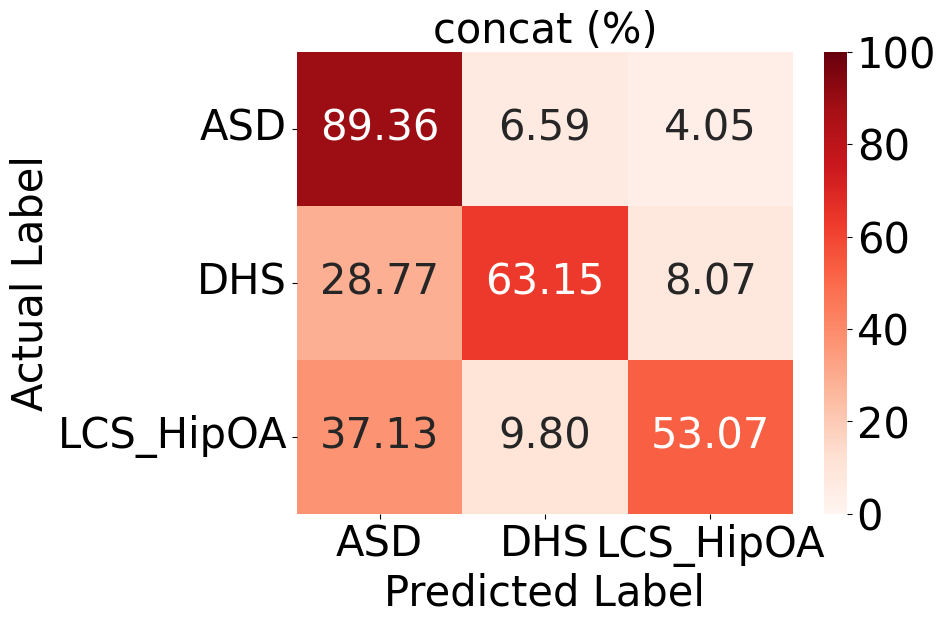

****************************************************************************************************
pegasus, avg
fold: 7
****************************************************************************************************
avg
accuracy: 0.6847
precision: 0.6797
recall: 0.6847
f1_score: 0.6722
auroc: 0.8427
confusion_matrix:
[[78.33369    5.7875767 15.8787365]
 [31.241365  61.870926   6.887705 ]
 [17.75809   17.026194  65.21572  ]]
####################################################################################################


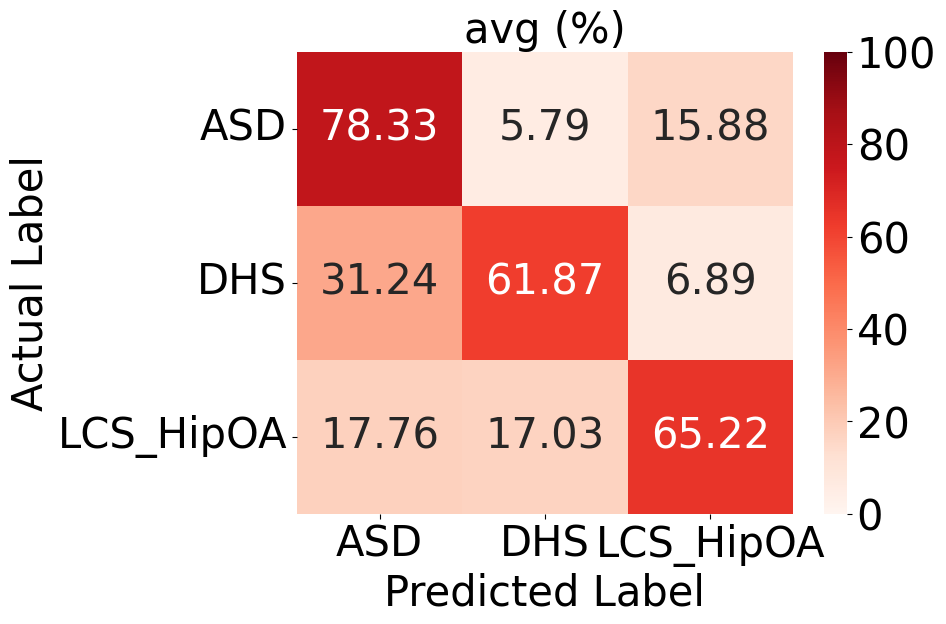

****************************************************************************************************
pegasus, late
fold: 7
****************************************************************************************************
late
accuracy: 0.6364
precision: 0.6585
recall: 0.6364
f1_score: 0.6202
auroc: 0.7826
confusion_matrix:
[[82.84927    3.9219842 13.228747 ]
 [36.17525   47.977108  15.847641 ]
 [30.662558   9.257833  60.07961  ]]
####################################################################################################


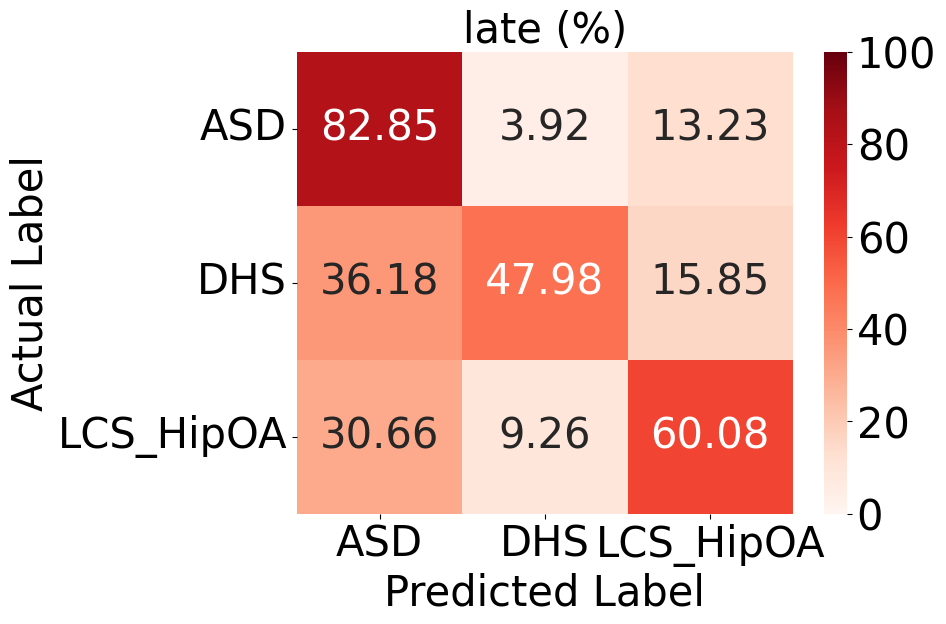

****************************************************************************************************
pegasus, none
fold: 8
****************************************************************************************************
none
accuracy: 0.7085
precision: 0.7161
recall: 0.7085
f1_score: 0.6981
auroc: 0.8574
confusion_matrix:
[[80.684      6.1594834 13.156517 ]
 [28.77267   66.45537    4.771967 ]
 [25.035316   9.562099  65.40259  ]]
####################################################################################################


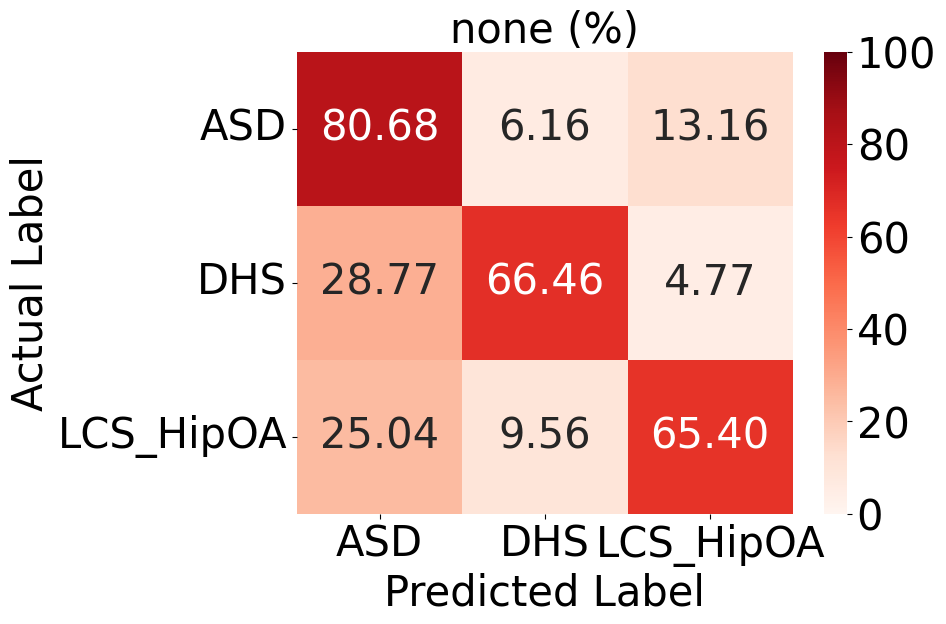

Summary of Metrics:
Model	Fold	accuracy	precision	recall	f1_score	auroc
add	10	0.6987246870994568	0.7386577725410461	0.6987246870994568	0.6993141770362854	0.8364307284355164
mul	10	0.49768781661987305	0.6433287262916565	0.49768781661987305	0.4796060621738434	0.7079181671142578
concat	7	0.6852673292160034	0.7046875953674316	0.6852673292160034	0.6600053310394287	0.799366295337677
avg	7	0.6847344636917114	0.6797319650650024	0.6847344636917114	0.6722065210342407	0.8427318930625916
late	7	0.6363532543182373	0.6585140228271484	0.6363532543182373	0.6201668381690979	0.7826243042945862
none	8	0.7084732055664062	0.7160972356796265	0.7084732055664062	0.6981038451194763	0.857434093952179



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
from pathlib import Path
import pandas as pd

from torchmetrics.classification import (
MulticlassAccuracy,
MulticlassPrecision,
MulticlassRecall,
MulticlassF1Score,
MulticlassConfusionMatrix,
MulticlassAUROC,
)

# analysis with title/res path pair

def analysis_with_title_res_path_pair(pair: dict, flag: str = "with_attn_loss"):

	summary_records = []
	
	for title, res_path in pair.items():
		
		fold = 0
		print('*' * 100)
		print(f"{flag}, {title}")
		all_label = []
		all_pred = []
		
		fold = int(len(list(Path(res_path).iterdir())) / 2 )

		print(f"fold: {fold}")

		for i in range(fold):
			label = torch.load(f"{res_path}/{i}_label.pt", map_location="cpu").to(torch.int)
			pred = torch.load(f"{res_path}/{i}_pred.pt", map_location="cpu")
			all_label.append(label)
			all_pred.append(pred)

		all_label = torch.cat(all_label, dim=0)
		all_pred = torch.cat(all_pred, dim=0)
		
		print('*' * 100)
		print(title)
		confusion_matrix_data, metric_dict = metrics(all_pred, all_label, num_class=3)
		print('#' * 100)

		# save summary records
		summary_row = {"Model": title, "Fold": fold}
		summary_row.update(metric_dict)
		summary_records.append(summary_row)

		plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})
		axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

		# draw confusion matrix
		plt.figure(figsize=(8, 6))
		sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
		# plt.title(f'{title} (%)', fontsize=30)
		plt.title(f"{title} (%)", fontsize=30)
		plt.ylabel('Actual Label', fontsize=30)
		plt.xlabel('Predicted Label', fontsize=30)
		plt.show()
    	
	df_summary = pd.DataFrame(summary_records)
	print("Summary of Metrics:")
	print(df_summary.to_csv(sep="\t", index=False))

def metrics(all_pred: torch.Tensor, all_label: torch.Tensor, num_class: int = 3):
    # define metrics
    _accuracy = MulticlassAccuracy(num_class)
    _precision = MulticlassPrecision(num_class)
    _recall = MulticlassRecall(num_class)
    _f1_score = MulticlassF1Score(num_class)
    _auroc = MulticlassAUROC(num_class)
    _confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")

    accuracy = _accuracy(all_pred, all_label).item()
    precision = _precision(all_pred, all_label).item()
    recall = _recall(all_pred, all_label).item()
    f1 = _f1_score(all_pred, all_label).item()
    auroc = _auroc(all_pred, all_label).item()
    cm = _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

    print(f"accuracy: {accuracy:.4f}")
    print(f"precision: {precision:.4f}")
    print(f"recall: {recall:.4f}")
    print(f"f1_score: {f1:.4f}")
    print(f"auroc: {auroc:.4f}")
    print(f"confusion_matrix:\n{cm}")

    metrics_dict = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "auroc": auroc,
    }

    return cm, metrics_dict

analysis_with_title_res_path_pair(pegasus, flag="pegasus")